# Project: Housing prices

## Libraries

In [224]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import sklearn
import seaborn as sns
import random 


from pandas_profiling import ProfileReport
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline 

## Import data


The dataset contains the following information:
- **longitude**: A measure of how far west a house is; a higher value is farther west
- **latitude**: A measure of how far north a house is; a higher value is farther north
- **housingMedianAge**: Median age of a house within a block; a lower number is a newer building
- **totalRooms**: Total number of rooms within a block
- **totalBedrooms**: Total number of bedrooms within a block
- **population**: Total number of people residing within a block
- **households**: Total number of households, a group of people residing within a home unit, for a block
- **medianIncome**: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- **medianHouseValue**: Median house value for households within a block (measured in US Dollars)
- **oceanProximity**: Location of the house w.r.t ocean/sea

The dataset contains **10** columns and **20640** rows

In [112]:
datapath = 'C:/Users/giusy/data/cal-housing.csv' #change the path here

data= pd.read_csv(datapath, index_col=False)
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [113]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

## Data exploration 

Explore data to get some insights

In [162]:
profile = ProfileReport(data)
profile

In [ ]:
#pairplots of the variables
sns.set()
sns.pairplot(data[['housing_median_age','total_rooms', 'total_bedrooms', 'population', 'households', 'median_income',
                  'median_house_value']])

In [ ]:
sns.distplot(data['median_house_value']);
fig = plt.figure()

In [ ]:
#3D plot of latitude, longitude and median_house_value
fig= plt.figure(figsize=(16,8))
ax=plt.axes(projection='3d')

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('House value')
ax.scatter3D(data['latitude'], data['longitude'], data['median_house_value'], c='black')

plt.show()

## Preprocessing 

### Missing values

Since the dataset contains 20640 and the missing values for the attribute **total_bedrooms** accounts for just 0.1% of missing data in the whole dataset (1% for the attribute), as shown above in the Profiling Report, a listwise deletion is applied to remove  all data for an observation that has a missing value for the attirbute "total_bedrooms". 

It is expected that this will not affect the results since the number of observations is higher than the number of deleted rows


In [225]:
data.dropna(inplace=True)
data.shape
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

The new dataset contains **20422** rows and **10** columns 

### Data encoding

Substitute the attribute **Ocean_proximity** with 5 dummy variables that are equal to 0 or 1 depending on where the house is located. There are 5 categories: "<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"

In [226]:
encoded_data =pd.get_dummies(data['ocean_proximity'])
encoded_data.head()

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          0       0       0         1           0
1          0       0       0         1           0
2          0       0       0         1           0
3          0       0       0         1           0
4          0       0       0         1           0

In [227]:
dataset= pd.merge(left=data, right=encoded_data, on=encoded_data.index)
dataset.drop(['ocean_proximity', 'key_0'], axis=1, inplace=True)
dataset.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  <1H OCEAN  \
0       322.0       126.0         8.3252            452600.0          0   
1      2401.0      1138.0         8.3014            358500.0          0   
2       496.0       177.0         7.2574            352100.0          0   
3       558.0       219.0         5.6431            341300.0          0   
4       565.0       259.0         3.8462            342200.0          0   

   INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0       0       0         1           0  
1       0       0         1           0  
2       0       0         1           0  
3       0       0         1           0  
4       0       0         1           0

The final dataset contains all the original attributes, including 5 new dummy variables that account for Ocean_proximity.
Therefore there are **20433** rows and **14** columns 

In [228]:
X = dataset.drop('median_house_value', axis=1).values
y = dataset['median_house_value'].values

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

### Data standardization
Standardize the test and train sets except the dependent variable **median_house_value**

In [230]:
standard_scaler = preprocessing.StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

In [231]:
pd.DataFrame(X_train_standard).head()

0         1         2         3         4         5         6  \
0 -1.106514  0.786208 -1.162062  0.829311  0.929297  1.131110  1.040744   
1 -0.024671  0.467873  0.348657 -0.738558 -0.850523 -0.708899 -0.856152   
2  0.758045 -0.711838 -0.287435  0.587350  0.747242  0.378459  0.691525   
3  0.633408 -0.735245 -0.048901 -0.122742  0.989183  1.185124  1.048681   
4  1.151895 -1.217429 -0.128412 -0.365632 -0.345083 -0.105008 -0.247664   

          7         8         9        10       11        12  
0  0.438412  1.122740 -0.678799 -0.013549 -0.35637 -0.385407  
1 -0.242389 -0.890678  1.473189 -0.013549 -0.35637 -0.385407  
2 -0.108969 -0.890678  1.473189 -0.013549 -0.35637 -0.385407  
3 -0.861168  1.122740 -0.678799 -0.013549 -0.35637 -0.385407  
4 -0.168986 -0.890678 -0.678799 -0.013549 -0.35637  2.594660

## Modelling

### Baseline model: Ridge from scratch 

We start by defining a model using Ridge regression with gradient descent 

In [232]:
class RidgeRegression_scr() : 
      
    def __init__( self, learning_rate, iterations, alpha ) : 
          
        self.learning_rate = learning_rate         #initialize
        self.iterations = iterations         
        self.alpha = alpha 
          
              
    def fit(self,X,y) : #fit function
                   
        self.m, self.n = X.shape  #initialize number of examples, number of features       
        self.W = np.zeros( self.n ) #initialize weights 
        self.b = 0        
        self.X = X         
        self.y = y 
                  
        for i in range( self.iterations ) :             #gradient descent iterations
            self.update_weights()             
        return self
    
      
    def update_weights( self ) :            #function to update weights 
        y_pred = self.predict( self.X )     #predict values of y
              
        dW = ( - ( 2 * ( self.X.T ).dot( self.y - y_pred ) ) +     #weights gradient           
               ( 2 * self.alpha * self.W ) ) / self.m      
        db = - 2 * np.sum( self.y - y_pred ) / self.m  #intercept gradient
          
        self.W = self.W - self.learning_rate * dW   #update weight: old weight-step size  
        self.b = self.b - self.learning_rate * db   #update intercept: old intercept -step size      
        return self
      

    def predict( self, X ) :     # make prediction using weights and intercept found
        return X.dot( self.W ) + self.b
      

In [233]:
ridge_reg = RidgeRegression_scr(iterations = 1000, learning_rate = 0.1, alpha=15)   #define learner 
ridge_reg.fit(X_train_standard, y_train)  #fit
ridge_reg_pred = ridge_reg.predict(X_test_standard)   #predict

In [234]:
def mean_squared_error_src(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error =  actual[i] - predicted[i]
        sum_error += (prediction_error ** 2)
    mean_squared_error = sum_error / float(len(actual))
    return mean_squared_error

Compute test predictions and measure test error 

In [235]:
error = mean_squared_error_src(y_test, ridge_reg_pred)
print(f'Test MSE: {error}')
#for more interpretability
print(f'Test RMSE: {np.sqrt(error)}')

Test MSE: 4802133097.553134
Test RMSE: 69297.42489842702


The baseline model built derived with Ridge Regression from scratch is able to predict **median_house_value** with an error of approximately $69.297,42

## Cross-Validation

In the following I define two functions: **cv_folds_split** and **CVkfold**, used to implement Cross-Validation from scratch

In [236]:
 def cv_folds_split(X, y, number_folds):
        X_split = []       #define arrays of splitted folds
        y_split = []
        X_copy = X
        y_copy= y
        fold_size = int(X_copy.shape[0] / number_folds)   #determine the size of each fold depending on the number of folds
        
        # create folds
        for i in range(number_folds):
            random.seed(42)     #set seed to replicate                                   
            X_fold = []         #empty fold
            y_fold = []
            #  select elements for the folds
            while len(X_fold) < fold_size:
                r = random.randrange(X_copy.shape[0])                # select a random element
                X_index = r
                y_index = r
                X_fold.append(X_copy[X_index].tolist())  # save the randomly selected line
                y_fold.append(y_copy[y_index])
                X_copy = np.delete(X_copy, X_index, 0)            # delete the randomly selected line from dataframe 
                y_copy = np.delete(y_copy, y_index, 0 )
            X_split.append(np.asarray(X_fold))                      # save the entire fold  
            y_split.append(np.asarray(y_fold))
            
        return X_split, y_split                                  #return the arrays of splitted folds                  

In [237]:
def CVkfold(X, y, number_folds, parameter, model="Ridge"):
    X_split, y_split = cv_folds_split(X, y, number_folds)    #split the dataset 
    validation_error=[]
    training_error=[]
    
    # determine training and test sets 
    for i in range(number_folds):
        X_train = [[]]
        y_train = []           #define the arrays and matrix that will conatin train and test folds 
        X_val = [[]]
        y_val = []
        
        folds= list(range(number_folds))
        folds.pop(i)
        
        X_val= X_split[i]      #test is the i-th fold
        y_val= y_split[i]
        for j in folds:
            if j == folds[0]:
                X_train = X_split[j]      #the remaining folds are used to train the model 
                y_train = y_split[j]
            else: 
                X_train = np.concatenate((X_train, X_split[j]), axis=0)
                y_train = np.concatenate((y_train, y_split[j]), axis=0)
                
    # apply Ridge Regression
        if model == "Ridge":
            ridge_reg = RidgeRegression_scr(iterations = 1000, learning_rate = 0.1, alpha = parameter)
            ridge_reg.fit(X_train, y_train)
           
            
        # calculate validation error   
        prediction = ridge_reg.predict(X_val)
        val_error = mean_squared_error_src(y_val, prediction)
        validation_error.append(val_error)
        
        # calculate training error   
        prediction = ridge_reg.predict(X_train)
        train_error = mean_squared_error_src(y_train, prediction)
        training_error.append(train_error)
        
    return validation_error, training_error

In [238]:
#applying cross validation 
alpha = np.linspace(0.1,20.0,10)
validation_mean_error = []
training_mean_error=[]
for a in alpha:
    val_error, train_error= CVkfold(X_train_standard, y_train, 5, a, model='Ridge') 
    print("alpha: ", a)
    print(f'Validation Mean Error: ', np.sqrt(np.mean(val_error)))
    validation_mean_error.append(np.sqrt(np.mean(val_error)))
    print(f'Training Mean Error: ', np.sqrt(np.mean(train_error)))
    training_mean_error.append(np.sqrt(np.mean(train_error)))


alpha:  0.1
Validation Mean Error:  68677.38155921247
Training Mean Error:  68468.22542171282
alpha:  2.311111111111111
Validation Mean Error:  68676.84838782791
Training Mean Error:  68468.43223454672
alpha:  4.522222222222221
Validation Mean Error:  68676.42322595416
Training Mean Error:  68468.73946680965
alpha:  6.7333333333333325
Validation Mean Error:  68676.10271343408
Training Mean Error:  68469.14390339865
alpha:  8.944444444444443
Validation Mean Error:  68675.88360298946
Training Mean Error:  68469.64243812948
alpha:  11.155555555555553
Validation Mean Error:  68675.76275610675
Training Mean Error:  68470.23206975443
alpha:  13.366666666666665
Validation Mean Error:  68675.73713908235
Training Mean Error:  68470.90989813466
alpha:  15.577777777777776
Validation Mean Error:  68675.8038192222
Training Mean Error:  68471.67312056207
alpha:  17.788888888888888
Validation Mean Error:  68675.95996118785
Training Mean Error:  68472.5190282229
alpha:  20.0
Validation Mean Error:  68

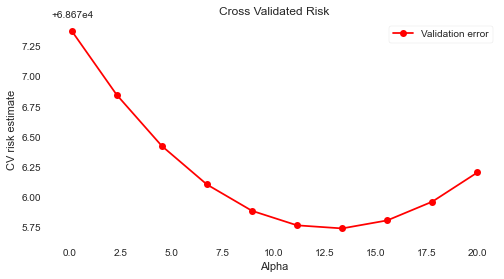

In [239]:
alpha = np.linspace(0.1,20.0,10)
plt.figure(figsize=(8,4))
plt.title('Cross Validated Risk')
plt.plot(alpha, validation_mean_error,  'o-',  label='Validation error', color="r")
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('CV risk estimate')
plt.show()

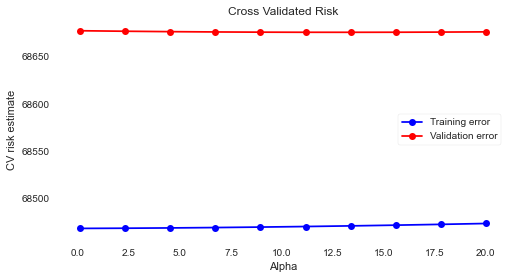

In [240]:
alpha = np.linspace(0.1,20.0,10)
plt.figure(figsize=(8,4))
plt.title('Cross Validated Risk')
plt.plot(alpha, training_mean_error,  'o-',  label='Training error', color="b")
plt.plot(alpha, validation_mean_error,  'o-',  label='Validation error', color="r")
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('CV risk estimate')
plt.show()

In [241]:
#find best parameter  
minimum= min(validation_mean_error)
index= validation_mean_error.index(minimum)
print("Best parameter:", alpha[index])
print("Error:", minimum)

Best parameter: 13.366666666666665
Error: 68675.73713908235


Retraining the model on the entire training set with the optimal parameter choosen with cross-validation and testing on the test set 

In [242]:
ridge_reg = RidgeRegression_scr(iterations = 1000, learning_rate = 0.1, alpha = 13.36)   #define learner 
ridge_reg.fit(X_train_standard, y_train)  #fit
ridge_reg_pred = ridge_reg.predict(X_test_standard)   #predict

In [243]:
error = mean_squared_error_src(y_test, ridge_reg_pred)
print(f'Test MSE: {error}')
#for more interpretability
print(f'Test RMSE: {np.sqrt(error)}')

Test MSE: 4802052771.464756
Test RMSE: 69296.84532115987


## PCA

Try to imporve the predictions by using PCA to reduce the dimensionality of the dataset and eliminate correlation 

Text(0, 0.5, 'cumulative explained variance')

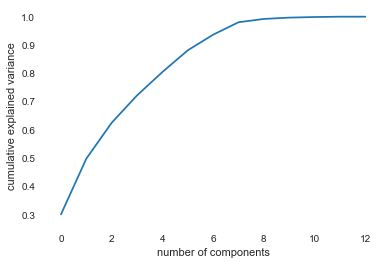

In [244]:
pca = PCA(n_components = 13) 
  
X_train = pca.fit_transform(X_train_standard) 
X_test = pca.transform(X_test_standard) 
  
explained_variance = pca.explained_variance_ratio_
  
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [245]:
explained_variance

array([3.01049405e-01, 1.96987767e-01, 1.27027845e-01, 9.67165345e-02,
       8.26937912e-02, 7.66791334e-02, 5.52239630e-02, 4.39794536e-02,
       1.17036165e-02, 4.72425516e-03, 2.02975912e-03, 1.18447672e-03,
       2.86220882e-32])

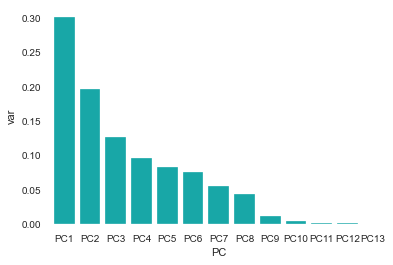

In [246]:
pc_df = pd.DataFrame(data = X_train , 
        columns = ['PC1', 'PC2','PC3','PC4', 'PC5', 'PC6','PC7','PC8','PC9', 'PC10','PC11','PC12', 'PC13'])
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1', 'PC2','PC3','PC4', 'PC5', 'PC6','PC7','PC8','PC9', 'PC10','PC11','PC12', 'PC13']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

The treshold considered for PCA is 95% of the variation. In order to retain 95% of the variation 8 components must be used Therefore I apply PCA setting n_components=8

In [247]:
pca = PCA(n_components=8)
pca.fit(X_train_standard)
X_train_pca= pca.transform(X_train_standard)
X_test_pca= pca.transform(X_test_standard)

applying ridge regression with the value found with cross validation, results are worse with PCA

In [248]:
ridge_reg = RidgeRegression_scr(iterations = 1000, learning_rate = 0.1, alpha = 13.36)   #define learner 
ridge_reg.fit(X_train_pca, y_train)  #fit
ridge_reg_pred = ridge_reg.predict(X_test_pca)   #predict

In [249]:
error = mean_squared_error_src(y_test, ridge_reg_pred)
print(f'Test MSE: {error}')
#for more interpretability
print(f'Test RMSE: {np.sqrt(error)}')

Test MSE: 5432567290.275973
Test RMSE: 73705.95152547705


In [250]:
#applying cross validation 
alpha = np.linspace(0.1,20.0,10)
validation_mean_error = []
training_mean_error=[]
for a in alpha:
    val_error, train_error= CVkfold(X_train_pca, y_train, 5, a, model='Ridge') 
    print("alpha: ", a)
    print(f'Validation Mean Error: ', np.sqrt(np.mean(val_error)))
    validation_mean_error.append(np.sqrt(np.mean(val_error)))
    print(f'Training Mean Error: ', np.sqrt(np.mean(train_error)))
    training_mean_error.append(np.sqrt(np.mean(train_error)))


alpha:  0.1
Validation Mean Error:  72566.72787075995
Training Mean Error:  72523.9516508501
alpha:  2.311111111111111
Validation Mean Error:  72566.72268915686
Training Mean Error:  72523.95284876338
alpha:  4.522222222222221
Validation Mean Error:  72566.719710898
Training Mean Error:  72523.95624213752
alpha:  6.7333333333333325
Validation Mean Error:  72566.71893362995
Training Mean Error:  72523.96182862842
alpha:  8.944444444444443
Validation Mean Error:  72566.72035500205
Training Mean Error:  72523.96960589454
alpha:  11.155555555555553
Validation Mean Error:  72566.72397266632
Training Mean Error:  72523.97957159716
alpha:  13.366666666666665
Validation Mean Error:  72566.72978427754
Training Mean Error:  72523.99172340024
alpha:  15.577777777777776
Validation Mean Error:  72566.73778749329
Training Mean Error:  72524.00605897066
alpha:  17.788888888888888
Validation Mean Error:  72566.7479799736
Training Mean Error:  72524.02257597755
alpha:  20.0
Validation Mean Error:  7256

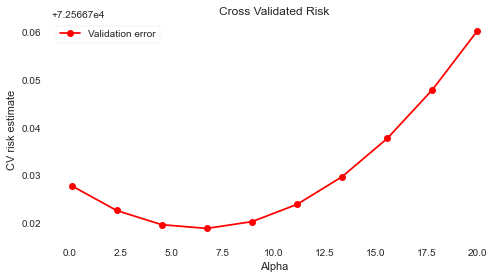

In [251]:
alpha = np.linspace(0.1,20.0,10)
plt.figure(figsize=(8,4))
plt.title('Cross Validated Risk')
plt.plot(alpha, validation_mean_error,  'o-',  label='Validation error', color="r")
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('CV risk estimate')
plt.show()

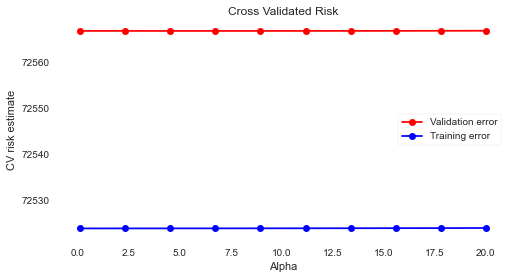

In [252]:
alpha = np.linspace(0.1,20.0,10)
plt.figure(figsize=(8,4))
plt.title('Cross Validated Risk')
plt.plot(alpha, validation_mean_error,  'o-',  label='Validation error', color="r")
plt.plot(alpha, training_mean_error,  'o-',  label='Training error', color="b")
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('CV risk estimate')
plt.show()

In [253]:
#find best parameter  
minimum= min(validation_mean_error)
index= validation_mean_error.index(minimum)
print("Best parameter:", alpha[index])
print("Error:", minimum)

Best parameter: 6.7333333333333325
Error: 72566.71893362995


In [254]:
ridge_reg = RidgeRegression_scr(iterations = 1000, learning_rate = 0.1, alpha = 6.73)   #define learner 
ridge_reg.fit(X_train_pca, y_train)  #fit
ridge_reg_pred = ridge_reg.predict(X_test_pca)   #predict

In [255]:
error = mean_squared_error_src(y_test, ridge_reg_pred)
print(f'Test MSE: {error}')
#for more interpretability
print(f'Test RMSE: {np.sqrt(error)}')

Test MSE: 5432563387.413356
Test RMSE: 73705.92504957356
